In [ ]:
#https://keras.io/getting-started/sequential-model-guide/
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [ ]:
#Multilayer Perceptron (MLP) for multi-class softmax classification:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

In [ ]:
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
---------------------------************Binary Classification**************---------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------

In [ ]:
#MLP for binary classification:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

In [ ]:
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
------------------------------------************ LSTM **************---------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------

In [2]:
# https://www.youtube.com/watch?v=iMIWee_PXl8&list=WL&index=25&t=0s

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
target = [(i+5)/100 for i in range(100)]
# at later stage we used normalize the data by dividing by 100
data = np.array(data, dtype=float)
target = np.array(target, dtype=float)
#data.shape
x_train, x_test, y_train, y_test = train_test_split(data, target,test_size=0.2, random_state=4)


In [53]:
model = Sequential()
model.add(LSTM( (1), batch_input_shape=(None,5,1), return_sequences=True)) 
model.add(LSTM( (1),return_sequences=False)) 
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
#model.summary()

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_9 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(x_train, y_train, epochs=800, validation_data=(x_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/800
80/80 [==============================] - 1s 10ms/step - loss: 0.5477 - accuracy: 0.0000e+00 - val_loss: 0.4396 - val_accuracy: 0.0000e+00
Epoch 2/800
80/80 [==============================] - 0s 299us/step - loss: 0.5454 - accuracy: 0.0000e+00 - val_loss: 0.4373 - val_accuracy: 0.0000e+00
Epoch 3/800
80/80 [==============================] - 0s 274us/step - loss: 0.5431 - accuracy: 0.0000e+00 - val_loss: 0.4350 - val_accuracy: 0.0000e+00
Epoch 4/800
80/80 [==============================] - 0s 424us/step - loss: 0.5407 - accuracy: 0.0000e+00 - val_loss: 0.4327 - val_accuracy: 0.0000e+00
Epoch 5/800
80/80 [==============================] - 0s 424us/step - loss: 0.5382 - accuracy: 0.0000e+00 - val_loss: 0.4303 - val_accuracy: 0.0000e+00
Epoch 6/800
80/80 [==============================] - 0s 399us/step - loss: 0.5357 - accuracy: 0.0000e+00 - val_loss: 0.4278 - val_accuracy: 0.0000e+00
Epoch 7/800
80/80 [==============================] 

Epoch 55/800
80/80 [==============================] - 0s 698us/step - loss: 0.3499 - accuracy: 0.0000e+00 - val_loss: 0.2447 - val_accuracy: 0.0000e+00
Epoch 56/800
80/80 [==============================] - 0s 499us/step - loss: 0.3452 - accuracy: 0.0000e+00 - val_loss: 0.2409 - val_accuracy: 0.0000e+00
Epoch 57/800
80/80 [==============================] - 0s 374us/step - loss: 0.3406 - accuracy: 0.0000e+00 - val_loss: 0.2376 - val_accuracy: 0.0000e+00
Epoch 58/800
80/80 [==============================] - 0s 898us/step - loss: 0.3359 - accuracy: 0.0000e+00 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 59/800
80/80 [==============================] - 0s 362us/step - loss: 0.3317 - accuracy: 0.0000e+00 - val_loss: 0.2309 - val_accuracy: 0.0000e+00
Epoch 60/800
80/80 [==============================] - 0s 337us/step - loss: 0.3271 - accuracy: 0.0000e+00 - val_loss: 0.2276 - val_accuracy: 0.0000e+00
Epoch 61/800
80/80 [==============================] - 0s 312us/step - loss: 0.3228 - acc

80/80 [==============================] - 0s 411us/step - loss: 0.2164 - accuracy: 0.0000e+00 - val_loss: 0.1766 - val_accuracy: 0.0500
Epoch 110/800
80/80 [==============================] - 0s 436us/step - loss: 0.2153 - accuracy: 0.0000e+00 - val_loss: 0.1763 - val_accuracy: 0.0500
Epoch 111/800
80/80 [==============================] - 0s 386us/step - loss: 0.2140 - accuracy: 0.0000e+00 - val_loss: 0.1759 - val_accuracy: 0.0500
Epoch 112/800
80/80 [==============================] - 0s 374us/step - loss: 0.2128 - accuracy: 0.0000e+00 - val_loss: 0.1754 - val_accuracy: 0.0500
Epoch 113/800
80/80 [==============================] - 0s 362us/step - loss: 0.2116 - accuracy: 0.0000e+00 - val_loss: 0.1749 - val_accuracy: 0.0500
Epoch 114/800
80/80 [==============================] - 0s 449us/step - loss: 0.2104 - accuracy: 0.0000e+00 - val_loss: 0.1743 - val_accuracy: 0.0500
Epoch 115/800
80/80 [==============================] - 0s 399us/step - loss: 0.2092 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 164/800
80/80 [==============================] - 0s 287us/step - loss: 0.1262 - accuracy: 0.0000e+00 - val_loss: 0.0933 - val_accuracy: 0.0500
Epoch 165/800
80/80 [==============================] - 0s 411us/step - loss: 0.1239 - accuracy: 0.0000e+00 - val_loss: 0.0907 - val_accuracy: 0.0500
Epoch 166/800
80/80 [==============================] - 0s 399us/step - loss: 0.1213 - accuracy: 0.0000e+00 - val_loss: 0.0879 - val_accuracy: 0.0500
Epoch 167/800
80/80 [==============================] - 0s 524us/step - loss: 0.1189 - accuracy: 0.0000e+00 - val_loss: 0.0850 - val_accuracy: 0.0500
Epoch 168/800
80/80 [==============================] - 0s 324us/step - loss: 0.1164 - accuracy: 0.0000e+00 - val_loss: 0.0819 - val_accuracy: 0.0500
Epoch 169/800
80/80 [==============================] - 0s 299us/step - loss: 0.1138 - accuracy: 0.0000e+00 - val_loss: 0.0790 - val_accuracy: 0.0500
Epoch 170/800
80/80 [==============================] - 0s 324us/step - loss: 0.1112 - accuracy: 0.0000e+00

Epoch 219/800
80/80 [==============================] - 0s 287us/step - loss: 0.0665 - accuracy: 0.0000e+00 - val_loss: 0.0568 - val_accuracy: 0.0500
Epoch 220/800
80/80 [==============================] - 0s 324us/step - loss: 0.0660 - accuracy: 0.0000e+00 - val_loss: 0.0566 - val_accuracy: 0.0500
Epoch 221/800
80/80 [==============================] - 0s 299us/step - loss: 0.0656 - accuracy: 0.0000e+00 - val_loss: 0.0564 - val_accuracy: 0.0500
Epoch 222/800
80/80 [==============================] - 0s 299us/step - loss: 0.0652 - accuracy: 0.0000e+00 - val_loss: 0.0563 - val_accuracy: 0.0500
Epoch 223/800
80/80 [==============================] - ETA: 0s - loss: 0.0775 - accuracy: 0.0000e+ - 0s 324us/step - loss: 0.0648 - accuracy: 0.0000e+00 - val_loss: 0.0560 - val_accuracy: 0.0500
Epoch 224/800
80/80 [==============================] - 0s 293us/step - loss: 0.0644 - accuracy: 0.0000e+00 - val_loss: 0.0559 - val_accuracy: 0.0500
Epoch 225/800
80/80 [==============================] - 0s 27

Epoch 328/800
80/80 [==============================] - 0s 312us/step - loss: 0.0438 - accuracy: 0.0000e+00 - val_loss: 0.0441 - val_accuracy: 0.0500
Epoch 329/800
80/80 [==============================] - 0s 312us/step - loss: 0.0438 - accuracy: 0.0000e+00 - val_loss: 0.0439 - val_accuracy: 0.0500
Epoch 330/800
80/80 [==============================] - 0s 299us/step - loss: 0.0438 - accuracy: 0.0000e+00 - val_loss: 0.0441 - val_accuracy: 0.0500
Epoch 331/800
80/80 [==============================] - 0s 299us/step - loss: 0.0436 - accuracy: 0.0000e+00 - val_loss: 0.0439 - val_accuracy: 0.0500
Epoch 332/800
80/80 [==============================] - 0s 312us/step - loss: 0.0435 - accuracy: 0.0000e+00 - val_loss: 0.0435 - val_accuracy: 0.0500
Epoch 333/800
80/80 [==============================] - 0s 287us/step - loss: 0.0433 - accuracy: 0.0000e+00 - val_loss: 0.0433 - val_accuracy: 0.0500
Epoch 334/800
80/80 [==============================] - 0s 324us/step - loss: 0.0432 - accuracy: 0.0000e+00

Epoch 383/800
80/80 [==============================] - 0s 287us/step - loss: 0.0394 - accuracy: 0.0000e+00 - val_loss: 0.0400 - val_accuracy: 0.0500
Epoch 384/800
80/80 [==============================] - 0s 299us/step - loss: 0.0393 - accuracy: 0.0000e+00 - val_loss: 0.0398 - val_accuracy: 0.0500
Epoch 385/800
80/80 [==============================] - 0s 312us/step - loss: 0.0392 - accuracy: 0.0000e+00 - val_loss: 0.0398 - val_accuracy: 0.0500
Epoch 386/800
80/80 [==============================] - 0s 287us/step - loss: 0.0392 - accuracy: 0.0000e+00 - val_loss: 0.0399 - val_accuracy: 0.0500
Epoch 387/800
80/80 [==============================] - 0s 299us/step - loss: 0.0391 - accuracy: 0.0000e+00 - val_loss: 0.0397 - val_accuracy: 0.0500
Epoch 388/800
80/80 [==============================] - 0s 312us/step - loss: 0.0390 - accuracy: 0.0000e+00 - val_loss: 0.0396 - val_accuracy: 0.0500
Epoch 389/800
80/80 [==============================] - 0s 274us/step - loss: 0.0389 - accuracy: 0.0000e+00

Epoch 438/800
80/80 [==============================] - 0s 287us/step - loss: 0.0364 - accuracy: 0.0000e+00 - val_loss: 0.0379 - val_accuracy: 0.0500
Epoch 439/800
80/80 [==============================] - 0s 299us/step - loss: 0.0365 - accuracy: 0.0000e+00 - val_loss: 0.0381 - val_accuracy: 0.0500
Epoch 440/800
80/80 [==============================] - 0s 287us/step - loss: 0.0364 - accuracy: 0.0000e+00 - val_loss: 0.0380 - val_accuracy: 0.0500
Epoch 441/800
80/80 [==============================] - 0s 299us/step - loss: 0.0364 - accuracy: 0.0000e+00 - val_loss: 0.0378 - val_accuracy: 0.0500
Epoch 442/800
80/80 [==============================] - 0s 312us/step - loss: 0.0363 - accuracy: 0.0000e+00 - val_loss: 0.0378 - val_accuracy: 0.0500
Epoch 443/800
80/80 [==============================] - 0s 299us/step - loss: 0.0362 - accuracy: 0.0000e+00 - val_loss: 0.0376 - val_accuracy: 0.0500
Epoch 444/800
80/80 [==============================] - 0s 312us/step - loss: 0.0362 - accuracy: 0.0000e+00

Epoch 493/800
80/80 [==============================] - 0s 287us/step - loss: 0.0343 - accuracy: 0.0000e+00 - val_loss: 0.0359 - val_accuracy: 0.0500
Epoch 494/800
80/80 [==============================] - 0s 299us/step - loss: 0.0343 - accuracy: 0.0000e+00 - val_loss: 0.0359 - val_accuracy: 0.0500
Epoch 495/800
80/80 [==============================] - 0s 312us/step - loss: 0.0343 - accuracy: 0.0000e+00 - val_loss: 0.0359 - val_accuracy: 0.0500
Epoch 496/800
80/80 [==============================] - 0s 287us/step - loss: 0.0343 - accuracy: 0.0000e+00 - val_loss: 0.0354 - val_accuracy: 0.0500
Epoch 497/800
80/80 [==============================] - 0s 324us/step - loss: 0.0342 - accuracy: 0.0000e+00 - val_loss: 0.0353 - val_accuracy: 0.0500
Epoch 498/800
80/80 [==============================] - 0s 299us/step - loss: 0.0342 - accuracy: 0.0000e+00 - val_loss: 0.0355 - val_accuracy: 0.0500
Epoch 499/800
80/80 [==============================] - 0s 299us/step - loss: 0.0341 - accuracy: 0.0000e+00

Epoch 548/800
80/80 [==============================] - 0s 312us/step - loss: 0.0327 - accuracy: 0.0000e+00 - val_loss: 0.0348 - val_accuracy: 0.0500
Epoch 549/800
80/80 [==============================] - 0s 312us/step - loss: 0.0326 - accuracy: 0.0000e+00 - val_loss: 0.0350 - val_accuracy: 0.0500
Epoch 550/800
80/80 [==============================] - 0s 299us/step - loss: 0.0326 - accuracy: 0.0000e+00 - val_loss: 0.0350 - val_accuracy: 0.0500
Epoch 551/800
80/80 [==============================] - 0s 299us/step - loss: 0.0326 - accuracy: 0.0000e+00 - val_loss: 0.0349 - val_accuracy: 0.0500
Epoch 552/800
80/80 [==============================] - 0s 312us/step - loss: 0.0325 - accuracy: 0.0000e+00 - val_loss: 0.0349 - val_accuracy: 0.0500
Epoch 553/800
80/80 [==============================] - 0s 287us/step - loss: 0.0326 - accuracy: 0.0000e+00 - val_loss: 0.0348 - val_accuracy: 0.0500
Epoch 554/800
80/80 [==============================] - 0s 299us/step - loss: 0.0325 - accuracy: 0.0000e+00

Epoch 603/800
80/80 [==============================] - 0s 287us/step - loss: 0.0313 - accuracy: 0.0000e+00 - val_loss: 0.0330 - val_accuracy: 0.0500
Epoch 604/800
80/80 [==============================] - 0s 312us/step - loss: 0.0313 - accuracy: 0.0000e+00 - val_loss: 0.0332 - val_accuracy: 0.0500
Epoch 605/800
80/80 [==============================] - 0s 274us/step - loss: 0.0312 - accuracy: 0.0000e+00 - val_loss: 0.0334 - val_accuracy: 0.0500
Epoch 606/800
80/80 [==============================] - 0s 299us/step - loss: 0.0312 - accuracy: 0.0000e+00 - val_loss: 0.0336 - val_accuracy: 0.0500
Epoch 607/800
80/80 [==============================] - 0s 312us/step - loss: 0.0312 - accuracy: 0.0000e+00 - val_loss: 0.0334 - val_accuracy: 0.0500
Epoch 608/800
80/80 [==============================] - 0s 312us/step - loss: 0.0312 - accuracy: 0.0000e+00 - val_loss: 0.0333 - val_accuracy: 0.0500
Epoch 609/800
80/80 [==============================] - 0s 299us/step - loss: 0.0311 - accuracy: 0.0000e+00

Epoch 658/800
80/80 [==============================] - 0s 312us/step - loss: 0.0301 - accuracy: 0.0000e+00 - val_loss: 0.0324 - val_accuracy: 0.0500
Epoch 659/800
80/80 [==============================] - 0s 287us/step - loss: 0.0301 - accuracy: 0.0000e+00 - val_loss: 0.0324 - val_accuracy: 0.0500
Epoch 660/800
80/80 [==============================] - 0s 274us/step - loss: 0.0301 - accuracy: 0.0000e+00 - val_loss: 0.0325 - val_accuracy: 0.0500
Epoch 661/800
80/80 [==============================] - 0s 337us/step - loss: 0.0301 - accuracy: 0.0000e+00 - val_loss: 0.0324 - val_accuracy: 0.0500
Epoch 662/800
80/80 [==============================] - 0s 274us/step - loss: 0.0301 - accuracy: 0.0000e+00 - val_loss: 0.0329 - val_accuracy: 0.0500
Epoch 663/800
80/80 [==============================] - 0s 299us/step - loss: 0.0300 - accuracy: 0.0000e+00 - val_loss: 0.0327 - val_accuracy: 0.0500
Epoch 664/800
80/80 [==============================] - 0s 287us/step - loss: 0.0300 - accuracy: 0.0000e+00

Epoch 713/800
80/80 [==============================] - 0s 324us/step - loss: 0.0292 - accuracy: 0.0000e+00 - val_loss: 0.0317 - val_accuracy: 0.0500
Epoch 714/800
80/80 [==============================] - 0s 324us/step - loss: 0.0291 - accuracy: 0.0000e+00 - val_loss: 0.0320 - val_accuracy: 0.0500
Epoch 715/800
80/80 [==============================] - 0s 299us/step - loss: 0.0291 - accuracy: 0.0000e+00 - val_loss: 0.0318 - val_accuracy: 0.0500
Epoch 716/800
80/80 [==============================] - 0s 287us/step - loss: 0.0291 - accuracy: 0.0000e+00 - val_loss: 0.0317 - val_accuracy: 0.0500
Epoch 717/800
80/80 [==============================] - 0s 349us/step - loss: 0.0291 - accuracy: 0.0000e+00 - val_loss: 0.0314 - val_accuracy: 0.0500
Epoch 718/800
80/80 [==============================] - 0s 274us/step - loss: 0.0290 - accuracy: 0.0000e+00 - val_loss: 0.0314 - val_accuracy: 0.0500
Epoch 719/800
80/80 [==============================] - 0s 287us/step - loss: 0.0291 - accuracy: 0.0000e+00

Epoch 768/800
80/80 [==============================] - 0s 299us/step - loss: 0.0283 - accuracy: 0.0000e+00 - val_loss: 0.0305 - val_accuracy: 0.0500
Epoch 769/800
80/80 [==============================] - 0s 274us/step - loss: 0.0286 - accuracy: 0.0000e+00 - val_loss: 0.0315 - val_accuracy: 0.0500
Epoch 770/800
80/80 [==============================] - 0s 324us/step - loss: 0.0283 - accuracy: 0.0000e+00 - val_loss: 0.0312 - val_accuracy: 0.0500
Epoch 771/800
80/80 [==============================] - 0s 274us/step - loss: 0.0283 - accuracy: 0.0000e+00 - val_loss: 0.0306 - val_accuracy: 0.0500
Epoch 772/800
80/80 [==============================] - 0s 299us/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 0.0308 - val_accuracy: 0.0500
Epoch 773/800
80/80 [==============================] - 0s 312us/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 0.0306 - val_accuracy: 0.0500
Epoch 774/800
80/80 [==============================] - 0s 299us/step - loss: 0.0282 - accuracy: 0.0000e+00

In [56]:
result = model.predict(x_test)

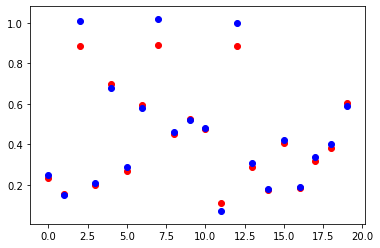

In [57]:
plt.scatter(range(20),result,c='r')
plt.scatter(range(20), y_test, c='b')
plt.show()

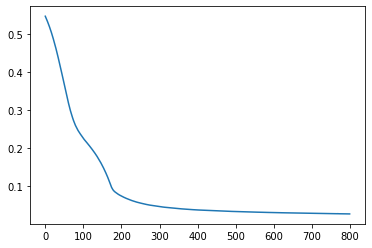

In [58]:
plt.plot(history.history['loss'])
plt.show()

In [ ]:
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
----------------------------------************CNN-LSTM **************--------------------------------------
-------------------------------------Need to check this method---------------------------------------------
-----------------------------------------------------------------------------------------------------------
#https://github.com/hotokokoa/MLProject-Car-demand-predict/blob/master/main.py      check for "ConvLSTM2D"

In [ ]:
#Check this: https://towardsdatascience.com/get-started-with-using-cnn-lstm-for-forecasting-6f0f4dde5826
model = Sequential()
model.add(TimeDistributed(conv1D(filters=5, kernel_size=3, activation='relu), batch_input_shape=(24,None,24,1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, stateful=True, return_sequences=True))
model.add(LSTM(10, stateful=True))
model.add(Dense(24))
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape', 'acc'])
model.summary()